# Radial Basis Functions: an Introduction.

This notebook is going to serve as a documented attempt at training a Radial Basis Function classifier to recognize handwritten numbers from the MNIST dataset.

I've made attempts to play around with machine learning in the past, but it was a painfully limited endeavour, because I had gotten a book called "Build your own Neural Network" By Tariq Rashid and essentially copied down a lot of code with no REAL intuition of why it worked the way it did.
I felt some vague sense of accomplishment when it seemed to work well, but I tried to change the code by building in some complexity that hadn't been specified by the author, and the result was that the model stazrt doing WORSE.
So I completely stopped for some time, until I came across Dr. Abu Mostafa of Caltech's YouTube course on Machine Learning. To test it out, I'm going to try experimenting with image classification.
I'm going to write a simple Radial basis function model and train it on the MNIST dataset.

## Step 1: Data.

The MNIST dataset is pretty popular in Machine Learning, it's kind of like the 'Hello World' of Artifical Intelligence.
I'm not going to waste any real amount of time going over it, because its extensive use in ML tutorials means it has been discussed to death many times over. 
Basically, this is data taken from some kind of gevernment department. it's actually a list in which each row has 785 entries.
The first 784 entries are each a number from 0 to 255, describing a color value for the pixel at that point on a 28 x 28 grid.
The last value is a number from 0 to 9, descibing which one digit number the grid depicts. The following code is going to first import all the code libraries I may need/ want to do all the things I want.
The second thing it will do is import all the data from my filesystem into this program, so that I can play around with the values.

In [397]:
# This is a math library, good for vector calculus.
# My goal is to understand well the math behind every decision I make,
# but then just have Numpy implement it for me anyways.
import numpy as np
# Plotting tool. This is good for data visualization in general,
# and will be invaluable when it comes to trying to figure out how well I'm doing.
import matplotlib.pyplot as plt
# Basic Math library
import math
%matplotlib inline

The csv file gives us a list of strings, each string consists of the solution, followed by $28 \times 28$ numbers from 0 to 255 indicating the brightness of each pixel in a $28 grid.

Now, let's generate a set of vectors, where each vector is just a list of pixel values for the grid.

In [398]:
# Opening the training set file
training_data_file = open('MNIST-Data/mnist_train.csv')

# Initialize trqaining X and Y sets
train_X = []
train_Y = []
training_lines = training_data_file.readlines()
training_data_file.close()
print('Reading input file...')
for i in range(len(training_lines)):
    line_vector = training_lines[i].split(',')
    # entries in list need to be floating point values
    for i in range(len(line_vector)):
        line_vector[i] = float(line_vector[i]) / 256
    line_sol = line_vector[0]
    line_map = line_vector[1:]
    train_X.append(line_map)
    train_Y.append(line_sol * 256)
    pass
print('Done')
train_X = np.array(train_X)

Reading input file...
Done


In [399]:
def display_map(vector):
    image_map = vector * 255
    image_map = image_map.reshape(28,28)
    plt.imshow(image_map, cmap="Greys")
    plt.show()
    pass

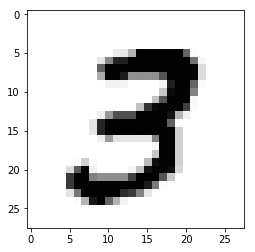

In [400]:
# Show the second line
display_map(train_X[7])

We will also want to format the $y$- values. Predicting the vaslue of a number as a real value is doable, but not ideal and not the right way to solve this problem. The numbers we're predicting aren't considered numbers by the predictor, just symbols the algorithm wants to recognize. So it's a far better idea to put them in buckets and try to predict the likelihood of a given number being in that bucket

In [401]:
def process_y (Y):
    train_Y = np.zeros((len(Y), 10))
    for i in range(len(Y)):
        train_Y[i][int(Y[i])] = 1
        pass
    return train_Y

In [402]:
train_Y = process_y(train_Y)

Let's display the vector for Y we've built.

In [403]:
def display_Y (Y):
    display_Y = np.array(Y).reshape(1, len(Y)) * 255
    plt.imshow(display_Y, cmap="Greys")
    plt.xticks(np.arange(0,10,1))
    plt.show()
    pass

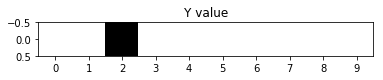

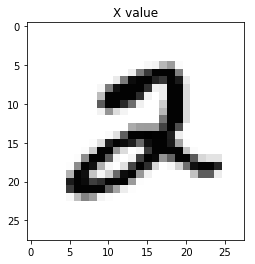

In [404]:
plt.title('Y value')
display_Y(train_Y[5])
plt.title('X value')
display_map(train_X[5])

## Step 2: The Radial Basis Function

The following equation depicts a gaussian distribution around a value $\mu$. Here's the equation:

\begin{equation}
\large
f(x) = w e^{-\lambda \|x - \mu\|^2}
\end{equation}

Here's what the equation looks like for a one-dimensioonal $x$.

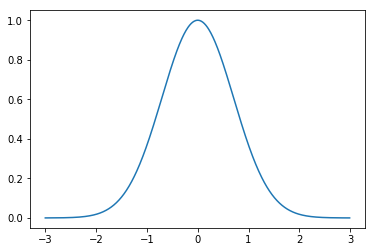

In [405]:
# generate a value from gaussian curve based on mu, lambda and w.
def gaussian (x, mu, lambda_val, w):
    dist = np.linalg.norm(x - mu) ** 2
    exponent = - lambda_val * dist
#     print(exponent, w)
    return w * math.exp(exponent)

# get x values between -3 and 3
x_range = np.arange(-3,3,0.01)
y_range = [gaussian(x,0,1,1) for x in x_range]

# Plot using matplotlib
plt.plot(x_range, y_range)
plt.show()

Now, let's vary those tricky looking greek sybols.

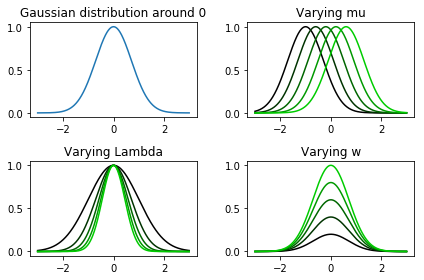

In [450]:
#Standardize x values
x_range = np.arange(-3,3,0.01)

f, ((ax0,ax1), (ax2,ax3)) = plt.subplots(2, 2)

# get x values between -3 and 3
x_range = np.arange(-3,3,0.01)
y_range = [gaussian(x,0,1,1) for x in x_range]

# Plot using matplotlib
ax0.plot(x_range, y_range)
ax0.set_title('Gaussian distribution around 0')

# Start by varying mu
ax1.set_title('Varying mu')
for i in range(5):
    color_vector = [0,i/5,0]
    mu_val = i/(2.5) - 1
    y_range = [gaussian(x,mu_val,1,1) for x in  x_range]
    ax1.plot(x_range, y_range, c=color_vector, label='mu = %2f' % mu_val)
    pass

# varying lambda
ax2.set_title('Varying Lambda')
for i in range(5):
    color_vector = [0,i/5,0]
    lambda_val = (i+1)/(2)
    y_range = [gaussian(x,0,lambda_val,1) for x in x_range]
    ax2.plot(x_range, y_range, c=color_vector, label='lambda = %2f' % lambda_val)
    pass


# varying w
ax3.set_title('Varying w')
for i in range(5):
    color_vector = [0,i/5,0]
    w_val = (i+1)/(5)
    y_range = [gaussian(x,0,1,w_val) for x in x_range]
    ax3.plot(x_range, y_range, c=color_vector, label='w = %2f' % w_val)
#     ax3.legend(loc='best')
    pass

plt.tight_layout()
plt.show()    

The Radial Basis Function is an aggregation of multiple Gaussian functions.

\begin{equation}
\large
f(x) = \sum_{k=1}^Kw_ke^{-\lambda_k\|x-\mu_k\|^2}
\end{equation}

The theory is that, if we use machine learning algorithms to give us a good set of $\mu$s, $\lambda$s and $w$s, then the function itself, given some set of new $x$ values that represent the map of a digit, our algorithm will just _happen_ to give us relatively accurate predictions for what the digit is.

In [407]:
def predict_RBF (x, mu, lambda_val, w):
    k = mu.shape[0]
    res = 0
    for k in range(K):
        res += gaussian(x, mu[k], lambda_val[k], w[k])
        pass
    return res

One thing to keep in mind is that, since we've changed the way our $Y$ works, we need to update X to match. This means we need to slightly modify our function to give us 10 different $f(x)$s. Maybe as a vector:

\begin{equation}
f(x) = 
\begin{bmatrix}
\sum_{k=1}^Kw_{0, k}e^{-\lambda_{0, k}\|x-\mu_{k}\|^2} \\
\sum_{k=1}^Kw_{1, k}e^{-\lambda_{2, k}\|x-\mu_{k}\|^2} \\
\vdots \\
\sum_{k=1}^Kw_{9, k}e^{-\lambda_{9, k}\|x-\mu_{k}\|^2} \\
\end{bmatrix}
\end{equation}

Notice how I've selected multiple sets of values for $w$ and $\lambda$ but not $\mu$. There's multiple reasons for this, for example the algorithm I'm using to choose $\mu$ happens to have nothing to do with what $y$ is, the algorithm is also _very_ computationally intensive, I only want to do it once.

In [408]:
def predict (x, mu, lambda_vals, ws):
    y = np.zeros((10, 1))
    for i in range(10):
        y[i] = predict_RBF(x, mu, lambda_vals[i], ws[i])
        pass
    return y

It's not necessarily easy to visualize how this function will gneeralize in more than one dimension; even two can be a bit of a stretch, but the bsst way to think about the Gaussian distribution is a probability distribution; an assumption that x values close to some location $\mu$, will also have a somewhat similar $y$ - values. I'm going to use three algorithms for each $\mu$, $\lambda$ and $w$. They will be as follows:

 - K-Means Clustering (Lloyd's Algorithm) for $\mu$
 - Linear Regression for $w$
 - Backpropagation for $\lambda$

## Step 3: K-Means Clustering on $\mu$

### Lloyd's Algorithm

Lloyd's algorithm works as follows:
 - Step 1: Pick a set of $\mu$ with RANDOM values in the space of your dataset.
     - A good way to to do this is to pick out K randomly selected _actual_ points from your dataset.
     - Another way, assuming you know the distribution, the mean and the standard deviation of the set, simulate that distribution and pick out a random member of it. For example, if your data is roughly normally distributed, and you pick out values of the form $\mathtt{mean}_{dataset} + \alpha \cdot\mathtt{(standardDeviation)}$, where $\alpha \in [-3, 3]$, you know that about 97% of your datapoints are covered by the range of these values.
 - Step 2: For each $\mu$ pick its cluster such that for each cluster of a given $\mu$ contains all the points closer to that $\mu$ than any other $\mu$.
 - Step 3: Update each $\mu$ to be the mean value of each datapoint in its cluster. You can actually just plug in this formula:
 \begin{equation}
 \mu_{new} = \frac{1}{\|S_{\mu}\|} \sum_{\mathbf{x} \in S_{\mu}}(\mathbf{x})
 \end{equation}
 where $S_{\mu}$ is the cluster of $\mu$.
 - Step 4: Repeat steps 2 and 3 iteratively, assuming the value converges eventually. I'm going to be plotting the mean squared error of this process (square distance of eadch cluster point to its mean) and see what number of iterations is required to make it coverge reasonably.
 - Step 5: Repeat steps 1 through 4 qa couple times, and pick out the converged $\mu$ with the lowest final error. The reason for this is that initial positions affect the quiality of the means by a lot and we don't want to subject our model to the luck of random chance.
 


In [479]:
class KMeans:

    def init_mu (self):
        size = self.X.shape
#         Declare the array of points mu
        mu = np.zeros((self.K, size[1]))
        for i in range(self.K):
#             Initialize mu to random points in X
            mu[i] = self.X[int(np.random.rand() * size[0])]
            pass
        return mu
    
    def __init__(self, X):
        self.X = X
#         Set K to a value logarithmic to the size of the set.
        self.K = int(math.log(X.shape[0])) * 5
        pass
    
    def get_clusters (self):
#         Initialize clusters
        clusters = [[] for i in range(self.K)]
        size = self.X.shape
#         Iterate over training data
        for i in range(size[0]):  
            best_dist = float('inf')
#         Iterate over mu
            for j in range(self.K):
#                 Get the distance between point and mu
                dist = np.linalg.norm(self.X[i] - self.mu[j])
#                 Save the best mu
                if dist < best_dist:
                    best_mu = j
                    best_dist = dist
                    pass
                pass
#             Add the point to the closest mu's cluster
            clusters[best_mu].append(self.X[i])
            pass
        return clusters
    
    def update_mu(self):
#         Iterate over clusters
        for i in range(len(self.clusters)):
#             Get the length of the cluster
            N = len(self.clusters[i])
            sum_points = 0
            for j in range(len(self.clusters[i])):
#                 Sum up members of cluster
                sum_points += self.clusters[i][j]
                pass
#             Set mu to average point in cluster
            if N != 0:
                self.mu[i] = sum_points / N
            else:
#                 If the cluster for a given mean is empty,
#                 reset it to a random value from X
                random_index = int(np.random.rand() *( self.X.shape[0]))
                self.mu[i] = self.X[random_index]
            pass
        return self.mu
    
    def get_error (self):
        N = self.X.shape[0]
        error = 0
#         loop over clusters
        for i in range(self.K):
            cluster = self.clusters[i]
            for j in range(len(cluster)):
#                 get distance between cluster and mean
                err = np.linalg.norm(cluster[j] - self.mu[i])
                error += err * err
                pass
            pass
        res = error / N
        return res

    def __call__ (self, num_trials, num_iterations, verbose=True):
        if verbose:
            print('Running Lloyd\'s algorithm on K = {}...'.format(self.K))
            plt.subplot(111)
            pass
        best_error = float('inf')
        for i in range(num_trials):
#             For each trial, initialize a new mu
            self.mu = self.init_mu()
#             measure a new set of errors
            mse = []
#             iterate and update mu accordingly.
            for j in range(num_iterations):
#                 Get the clusters for the given mu
                self.clusters = self.get_clusters()
#                 Update mu based on the mean of the clusters
                self.mu = self.update_mu()
#                 Calculate the error/ distance from mu to its cluster
                err = self.get_error()
                mse.append(err)
                pass
            if mse[-1] < best_error:
                best_mu = self.mu
                best_error = mse[-1]
                pass
            if verbose:
                print('Final mse for trial {} = {}'.format(i, mse[-1]))
                color_vector = [0, i/num_trials, 0]
                plt.plot(np.arange(0, num_iterations, 1), mse, c=color_vector)
                pass
            pass
        if verbose:
            plt.title('Accuracy of mean point over {} trials'.format(num_trials))
            plt.show()
            print('Saved best mu of size {}'.format(self.K))
            pass
        return best_mu
    pass

Running Lloyd's algorithm on K = 20...
Final mse for trial 0 = 25.505449938203004
Final mse for trial 1 = 25.55381197183232
Final mse for trial 2 = 24.51863409896123
Final mse for trial 3 = 24.923596321469258
Final mse for trial 4 = 24.065218583976204
Final mse for trial 5 = 26.420474260542115
Final mse for trial 6 = 23.99138448768604
Final mse for trial 7 = 25.494213107154472
Final mse for trial 8 = 24.7493975202442
Final mse for trial 9 = 25.032386683216096


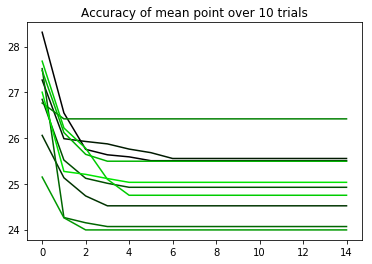

Saved best mu of size 20


In [480]:
Lloyd = KMeans(train_X[:100])
mu = Lloyd(10,15,True)

Let's look at the $\mu$'s we've gotten.

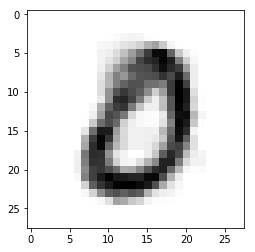

In [427]:
display_map(mu[4])

That is... really impressive. It looks like some of our $\mu$s actually approximate real numbers.
They've proven that, at least in this example, all $3$s have pixels in similar places, as do all $9$s, all $7$s, etc.
So training a classifier to do this should really be a piece of cake.

## Step 4: Linear Regression on $w$

The current model looks like the following:

\begin{equation}
f(x) = 
\begin{bmatrix}
\sum_{k=1}^Kw_{0, k}e^{-\lambda_{0, k}\|x-\mu_{k}\|^2} \\
\sum_{k=1}^Kw_{1, k}e^{-\lambda_{2, k}\|x-\mu_{k}\|^2} \\
\vdots \\
\sum_{k=1}^Kw_{9, k}e^{-\lambda_{9, k}\|x-\mu_{k}\|^2} \\
\end{bmatrix}
\end{equation}

This isn't the kind of equation we can reliably use for this algorithm, so we're going to split it up into the following: 

\begin{equation}
f_0(x) = \sum_{k=1}^Kw_{0, k}e^{-\lambda_{0, k}\|x-\mu_{k}\|^2} \\
f_1(x) = \sum_{k=1}^Kw_{1, k}e^{-\lambda_{1, k}\|x-\mu_{k}\|^2} \\
\vdots \\
f_9(x) = \sum_{k=1}^Kw_{9, k}e^{-\lambda_{9, k}\|x-\mu_{k}\|^2} \\
\end{equation}

To make this look much simpler, I'm going to explain the least squares regression algorithm for a single $f_i(x)$, and expand definition later by writing a wrapper that computes the 10 right values in the vector.

The summation by itself looks pretty interesting, but the general idea of summations in and of themselves can be extremely nasty, We're going to use a much prettier notation to write the exact same functon.

### Least Squares Regression

What is the value of defining $f(\mathbf{x})$ in terms of matrix multiplication? Well, this is function that builds the matrix $\mathbf{A}$ out of a given unkown $x$, and gives a single value $y$ after $\mathbf{A}$ is applied to $\mathbf{w}$. Well, let's assume, just for a moment, that the multiplication $\mathbf{Aw}$ gave you the best _possible_ approximaton for $y$ given what you had to work with. That would mean that, for every $n$, the following is true:

\begin{equation}
\begin{bmatrix}
e^{-\lambda_1\mathbf{\| x_n - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_n - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_n - \mu_k\|^2}}
\end{bmatrix} \cdot \begin{bmatrix} w_1 \\w_1\\\vdots\\w_K\end{bmatrix} \approx y_n
\end{equation}

But, since we have $N$ $n$s, couldn't we just extend our single row matrix, and output a column of $y_n$s?

\begin{equation}
\large
\begin{bmatrix}
e^{-\lambda_1\mathbf{\| x_1 - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_1 - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_1 - \mu_k\|^2}} \\
e^{-\lambda_1\mathbf{\| x_2 - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_2 - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_2 - \mu_k\|^2}} \\
\vdots & \vdots & \ddots & \vdots \\
e^{-\lambda_1\mathbf{\| x_N - \mu_1\|^2}} &
e^{-\lambda_2\mathbf{\| x_N - \mu_2\|^2}} &
\cdots &
e^{-\lambda_K\mathbf{\| x_N - \mu_k\|^2}}
\end{bmatrix} \cdot
\begin{bmatrix} w_1 \\w_2\\\vdots\\w_K\end{bmatrix} \approx
\begin{bmatrix} y_1 \\y_2\\\vdots\\y_K\end{bmatrix}
\end{equation}

Since we've already decided that this new matrix (we're going to call this one $\mathbf{A}$ instead now) is filled with constant values, given we know $\mu$s and assuming we know $\lambda$s, we can use the concept of least squares regression to give the best possible approximation for the entire vector $\mathbf{w}$

\begin{equation}
\mathbf{Aw = y} \\
\mathbf{w = (A^TA)^{-1}A^Ty}
\end{equation}

The matrix $\mathbf{(A^TA)^{-1}A^T}$ is called the **pseudo-inverse** of $\mathbf{A}$. This one definitely looks like magic, I know, but trust me, it works 100% of the time.

Now, we're just going to translate all this to code.

In [428]:
def regress_w(X, Y, mu, lambda_val):
    A = np.zeros((X.shape[0], mu.shape[0]))
    #   iterate over X
    for i in range(X.shape[0]):
        #     iterate over mu
        for j in range(mu.shape[0]):
            #     create vectors for x and mu
            _x = np.transpose([X[i]])
            _mu = np.transpose([mu[j]])
            #     Take the distance between point x and mu
            dist = np.linalg.norm(_x - _mu)
            #   square distance, multiply by lambda
            exponent = (- lambda_val[j]) * dist * dist
            A[i][j] = math.exp(exponent)
            pass
        pass

    #   Get ATA
    transpose = np.transpose(A)
    ATA = np.dot(transpose, A)

    #   Invert ATA
    pseudoInv = np.linalg.inv(ATA)

    #   Take inv(ATA) * ATy
    res = np.dot(transpose, Y)
    res = np.dot(pseudoInv, res)
    return res

def regress_ws(X, Y, mu, lambda_vals):
    ws = []
#     convert Y to arrays of boolean values for each digit.
    Y_range = np.transpose(Y)
    for i in range(10):
        ws.append(regress_w(X, Y_range[i], mu, lambda_vals[i]))
        pass
    ws = np.array(ws)
    return ws

Let's test this algorithm. But how are we going to measure it?

I'm going to define two error functions. The first one measures the mean squared error between the predicted and actual solutions.
It's going to look exactly like the error function I used to test the effectiveness of Lloyd's algorithm.
The second one is going to measure the accuracy of the overall model.
It's going to measure the number of correct solutions (i.e. solutions where the highest value in the vector denotes the correct digit) against the total number of examples.

In [429]:
def get_mse (train_X, train_Y, mu, lambda_vals, ws):
    mse = 0
    N = train_X.shape[0]
    for i in range(N):
        x = train_X[i]
        err = np.linalg.norm(train_Y[i] - predict(x, mu, lambda_vals, ws))
        err = err * err
        mse += err
        pass
    mse = mse / N
    return mse

def get_accuracy (train_X, train_Y, mu, lambda_val, ws):
    N = train_X.shape[0]
    true_positives = float(0)
    for i in range(N):
        x = train_X[i]
        predicted = predict(x, mu, lambda_vals, ws)
        actual = train_Y[i]
        if (np.argmax(predicted) == np.argmax(actual)):
            true_positives += 1
            pass
        pass
    return true_positives / N

Now to run the code. We have our $\mu$s, and I'm going to set $\lambda$ to all 1s.

Running Lloyd's algorithm on K = 27...
Final mse for trial 0 = 32.89090115203801
Final mse for trial 1 = 32.986256864125814
Final mse for trial 2 = 33.036863539630794
Final mse for trial 3 = 33.145886063398855
Final mse for trial 4 = 33.11288347398018


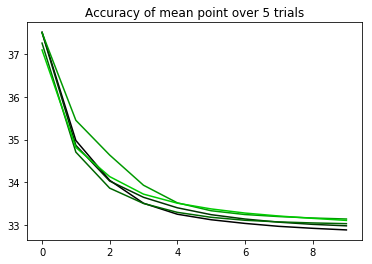

Saved best mu of size 27
Regressing on w...
Finding Mean Squared Error...
Total MSE for this model: 10.770286161129576
Accuracy for this model: 0.726


In [459]:
# Set up training and testing sets
(sample_size, test_size) = (10000, 500)
end_index = sample_size + test_size

# Run K-means on sample set, get mu and K
Lloyd = KMeans(train_X[:sample_size])
mu = Lloyd(5,10,True)
K = Lloyd.K

# Set lambda to 1 for all ws and digits
lambda_vals = np.ones((10, K))

print('Regressing on w...')
ws = regress_ws(train_X[:sample_size], train_Y[:sample_size], mu, lambda_vals)

# Find the mean squared error for the model.
print('Finding Mean Squared Error...')
loss = get_mse(train_X[sample_size:end_index], train_Y[sample_size:end_index], mu, lambda_vals, ws)
accuracy = get_accuracy(train_X[sample_size:end_index], train_Y[sample_size:end_index], mu, lambda_vals, ws)
print('Total MSE for this model: {}'.format(loss))
print('Accuracy for this model: {}'.format(accuracy))

Looks like 74% accuracy is the value to beat.

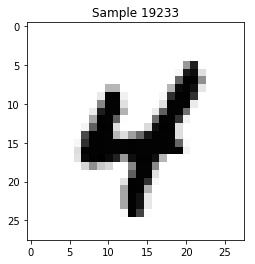

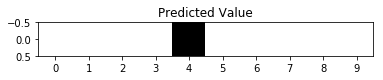

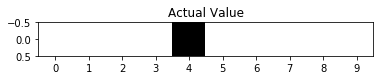

In [467]:
sample_ID = 19233
sample = train_X[sample_ID]
prediction = predict(sample, mu, lambda_vals, ws)
answer = train_Y[sample_ID]
plt.title('Sample {}'.format(sample_ID))
display_map(sample)
plt.title('Predicted Value')
display_Y(prediction)
plt.title('Actual Value')
display_Y(answer)


## Part 5: Stochastic Gradient Descent on $\lambda$

We're going to aplit up $f(x)$ into multiple classifiers for different digits just like we did for linear regression. WE're going to talk about a single set of $\lambda$s of size $K$.

Since $\lambda$ does not affect $f(x)$ linearly, there's no one "best answer" that we can immediately solve for.
Linear Algebra will do nothing for us here. We're going to have to switch to calculus to solve this problem.

We're going to ue a very simple definition of our pronblem. WE are currently predicting $y = sin{x}$, and then trying to find the right model to get that to happen. What if instead, we framed our problem in a different way.
Instead of fitting $f(x)$ to be a certain value at different times, let's take a function whose value we value to shift towards only one thing.
For example, let's look at the error between the predicted value of a input within our sample, and its actual value.

\begin{equation}
E_{in} = y - f(\mathbf{x})
\end{equation}

Even better, let's take the squared distance.

\begin{equation}
E_{in} = (y - f(\mathbf{x}))^2
\end{equation}

Now, our goal isn't to make $f(x)$ equal to 1 at $\frac{\pi}{2}$, or $0$ at multiples of $\pi$. When $f(x)$ deviates _in either direction_ of the correct value, higher or lower, $E_{in}$ goes up.
We have a much sinpler goal all of sudden - minimize $E_{in}$.
We're going to have to look at a concept straight out of multivariable calculus to solve this: gradients.

### Gradients

What is a gradient? In one dimension, it's just the slope of a curve.
But even in one dimension you can consider it useful when it comes to finding the minimum value of a function

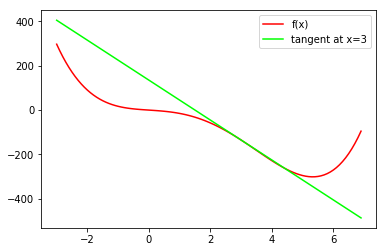

In [433]:
plt.subplot(111)
x = np. arange(-3,7,0.1)
y = lambda x : x ** 4 - 7 *x ** 3 - 9*x
grad = lambda x : 4 * x ** 3 - 21 *x ** 2 - 9
tangent_line = lambda s : grad(s) * x + (y(s) - grad(s)*s)
plt.plot(x, y(x), c=[1,0,0], label="f(x)")
plt.plot(x,tangent_line(3), c=[0,1,0], label="tangent at x=3")
plt.legend(loc='best')
plt.show()

### Descent

If you looked at and played around with gradients for a while, not just in one dimension but in multiple, you'd come across the true definition of gradient: the direction in which $f(\mathbf{x})$ increases the most rapidly.
You might notice that, in our previous diagram, the gradient at $x=3$ was negative, and if you pushed $x$ in the negative direction, $f(x)$ would got up.
The same would concept would apply in areas where the gradient is positive.
So, if we have a defined funciton, and we want to know what direction we need to move our parameters to increase a function's value, why not take a look at our error equation again?

\begin{equation}
\large
E_{in} = (y - f(\mathbf{x}))^2
\end{equation}

And what is the significance, if we take the partial differential of this equation with respect to $\lambda$?

So, for any given $|lambda$, we can now tell you what direction would most likely increase the value $E_{in}$. But, wait a minute.
We don't actually want that. Our goal is to **decrease** $E_{in}$.
So what would happen if we just went in the _negative_ of the gradient we got? It turns out, that would work perfectly.

So, the following algorithm for updating $\lambda_k$ would genuinely decrease the value of $E_{in}$ for a single value of x:

\begin{equation}
\lambda_k = \lambda_k + 2 \dot (y - f(\mathbf{x})) \mathbf{\| x - \mu_k\|^2} w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}

Here's the problem with that: It might not actually decrease in-sample error overall- the reason for this is moving each $\lambda$ in one direction for a single x might move it in the wrong direction for a different x.
So how do we make sure $\lambda_k$ is always moving is the right direction?

Well, suppose we moved it a _tiny_ bit in the right direction for every value of x, so that overall the error will slowly be pushed down for the entire set?
This is where we'll introduce a _learning rate_, or $\eta$, that need to be _very_ small, like between $0$ and $.001$, that we multiply by the value for $\frac{\partial E}{\partial \lambda_k}$ by \eta before adding it to $\lambda_k$

\begin{equation}
\lambda_k = \lambda_k + \eta (y - f(\mathbf{x})) \mathbf{\| x - \mu_k\|^2} w_k e^{-\lambda_k \mathbf{\| x - \mu_k \|^2}}
\end{equation}

Now, it's true that this already looks quite like a monster, but we need to add one more arbitration onto it before we're ready to see if it works, and that's making the whole thing apply to a vector.
We shouldn't have to calculate anything more times than is necessary, so the only term on the right side that expands is the one concerning $\mu$, $\lambda$ and $w@.
Out full equation for stochastic gradient descent looks like this:

\begin{equation}
\Large
\vec{\lambda} = \vec{\lambda}
+
\eta
 \dot (y - f(\mathbf{x}))
\cdot
\begin{bmatrix}
\mathbf{\| x - \mu_1\|^2} w_1 e^{-\lambda_1 \mathbf{\| x - \mu_1 \|^2}} \\
\mathbf{\| x - \mu_2\|^2} w_2 e^{-\lambda_2 \mathbf{\| x - \mu_2 \|^2}} \\
\vdots \\
\mathbf{\| x - \mu_K\|^2} w_K e^{-\lambda_K \mathbf{\| x - \mu_K \|^2}}
\end{bmatrix}
\end{equation}

Now, all that's left to do is try and code this into a new function that pushes $\lambda$ in the right direction for each x value.

I'm going to write two functions now, moving back to the extended case for multiple $\mathbf{\lambda}$s

In [485]:
def descend_lambda (x, y, mu, lambda_val, w, eta):
#     Predict the value of f(x)
#     'eta' is the learning rate, by the way
    f = predict_RBF(x, mu, lambda_val, w)
    coefficient = eta * np.linalg.norm(y - f)
    learning_vector = np.ones((mu.shape[0], 1))
    for i in range(mu.shape[0]):
        dist = np.linalg.norm(x - mu[i]) ** 2
        exponent = -lambda_val[i] * dist
        learning_vector[i] = dist * w[i] * math.exp(exponent)
        pass
    
    lambda_val = lambda_val.reshape((mu.shape[0], 1))
    new_lambda = lambda_val.copy() + coefficient * learning_vector
    return new_lambda

def descend_lambdas (x, y, mu, lambda_vals, ws, eta):
    lambdas = []
#     convert Y to arrays of boolean values for each digit.
    y_range = np.transpose(y)
    for i in range(10):
        lambdas.append(descend_lambda(x, y_range[i], mu, lambda_vals[i], ws[i], eta))
        pass
    lambdas = np.array(lambdas)
    return lambdas

Let's test out this machine and try to improve on the mean squared error

In [490]:
# Set up training and testing sets
(sample_size, test_size) = (5000, 500)
end_index = sample_size + test_size
# train for 5 epochs
num_epochs = 5
# Set small learning rate
eta = 1.2 / sample_size

# Get the relevant values
train_x = train_X[:sample_size]
train_y = train_Y[:sample_size]
test_x = train_X[sample_size:end_index]
test_y = train_Y[sample_size:end_index]

print('Running K-Means on mu...')
Lloyd = KMeans(train_x)
mu = Lloyd(5,10,False)
K = mu.shape[0]

# Set lambda to 1 for all ws and digits
lambda_vals = np.ones((10, K))
ws = regress_ws(train_x, train_y, mu, lambda_vals)

MSE_in = []
MSE_out = []

Acc_in = []
Acc_out = []

print('Beginning training...')
for epoch in range(num_epochs):
#     Run gradient descent on lambda
    for i in range(sample_size):
        lambda_vals = descend_lambdas(train_x[i], train_y[i], mu, lambda_vals, ws, eta)
        pass
#     Run linear regression on w
    ws = regress_ws(train_x, train_y, mu, lambda_vals)
    
#     In sample error
    mse_in = get_mse(train_x, train_y, mu, lambda_vals, ws)
    accuracy_in = get_accuracy(train_x, train_y, mu, lambda_vals, ws) * 100
#     Out of sample error
    mse_out = get_mse(test_x, test_y, mu, lambda_vals, ws)
    accuracy_out = get_accuracy(test_x, test_y, mu, lambda_vals, ws) * 100
#     print('For epoch {:d}, mse {:.3f} acc {:.2f}%'.format(epoch, mse_out, accuracy_out))
    print('For epoch {:d}:'.format(epoch))
    print('Mean Squared Error in: {:.3f} out: {:.3f}'.format(mse_in, mse_out))
    print('Accuracy in: {:.3f} out: {:.3f}'.format(accuracy_in, accuracy_out))
    
    MSE_in.append(mse_in)
    MSE_out.append(mse_out)
    
    Acc_in.append(accuracy_in)
    Acc_out.append(accuracy_out)
    
    pass

f, (axleft, axright) = plt.subplots(1, 2)
axleft.set_title('Mean Squared Error')
axleft.plot(np.arange(0,num_epochs,1), MSE_in, c = [0,1,0], label='In-sample MSE')
axleft.plot(np.arange(0,num_epochs,1), MSE_out, c = [0,0,1], label='Out-sample MSE')

axright.set_title('Accuracy')
axright.plot(np.arange(0,num_epochs,1), Acc_in, c = [0,1,0], label='In-sample accuracy')
axright.plot(np.arange(0,num_epochs,1), Acc_out, c = [0,0,1], label='Out-sample accuracy')

plt.tight_layout()
plt.show()

print('Final: ')
print('Mean Squared Error in: {:.3f} out: {:.3f}'.format(mse_in, mse_out))
print('Accuracy in: {:.3f} out: {:.3f}'.format(accuracy_in, accuracy_out))

Running K-Means on mu...
Beginning training...


KeyboardInterrupt: 